<a href="https://colab.research.google.com/github/felipedebiazi/Formacao-Machine-Learning-Specialist-DIO/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-gpu==2.0.0

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.0.0


In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [ ]:
%load_ext tensorboard

In [ ]:
logdir='log'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=1, 
            validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.1517 - accuracy: 0.9521 - val_loss: 0.0605 - val_accuracy: 0.9824


In [ ]:
y_true=test_labels
y_pred=model.predict_classes(test_images)

In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

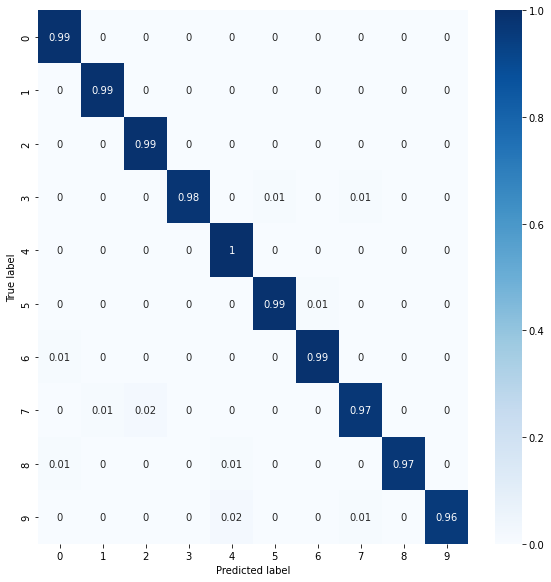

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
FP = con_mat.sum(axis=0) - np.diag(con_mat) 
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)
total_itens = 10000

# O resultado são arrays de 10 elementos (um para cada classe).
# FP[10] - array com os falsos positivos das 10 classes
# FN[10] - array com os falsos negativos das 10 classes
# VP[10] - array com os verdadeiros positivos das 10 classes
# VN[10] - array com os verdadeiros negativos das 10 classes

acuracia =  (VP + VN)/(FP + FN + VP + VN)
sensibilidade = VP/(VP+FN)
especificidade = VN/(VN+FP)
precisao = VP/(VP+FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)



print("Falsos Positivos: ", FP)
print("Falsos Negativos: ", FN)
print("Verdadeiros Positivos: ", VP)
print("Verdadeiros Negativos: ", VN)
print ("\nAcuracia: ", acuracia)
print ("\nSensibilidade: ", sensibilidade)
print ("\nEspecificidade: ", especificidade)
print ("\nPrecisão: ", precisao)
print ("\nf_score: ", f_score)

Falsos Positivos:  [28 16 28  5 41 14 11 22  5  6]
Falsos Negativos:  [ 8  8 10 21  0 12 13 33 27 44]
Verdadeiros Positivos:  [ 972 1127 1022  989  982  880  945  995  947  965]
Verdadeiros Negativos:  [8992 8849 8940 8985 8977 9094 9031 8950 9021 8985]

Acuracia:  [0.9964 0.9976 0.9962 0.9974 0.9959 0.9974 0.9976 0.9945 0.9968 0.995 ]

Sensibilidade:  [0.99183673 0.99295154 0.99031008 0.97920792 1.         0.98654709
 0.98643006 0.96789883 0.97227926 0.95639247]

Especificidade:  [0.99689579 0.99819515 0.99687779 0.99944383 0.99545354 0.99846289
 0.99878345 0.99754793 0.99944604 0.99933267]

Precisão:  [0.972      0.98600175 0.97333333 0.99496982 0.9599218  0.98434004
 0.98849372 0.97836775 0.9947479  0.9938208 ]

f_score:  [0.98181818 0.98946444 0.98174832 0.98702595 0.97955112 0.98544233
 0.98746082 0.97310513 0.98338525 0.97474747]
